## CA1 Data Preparation

### Import Libraries for performing data cleaning, analysis and visualizations. 

In [1]:
import pandas as pd   ##data analysis and manipulations tool 
import seaborn as sns  ##Visualization Library 
import numpy as np      ##Numerical python tool
import matplotlib.pyplot as plt   ##Visualization tool 
from sklearn.decomposition import PCA   ##Scikit-Learn, analytical library 

sns.set() #Using Seaborn graphics for all my visualizations

In [2]:
aps_df = pd.read_csv('aps_failure_set_CA1.csv')

### Visualizing head and tail of my dataset

In [130]:
aps_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### Here, there is some information abour my dataset
### e.g: index of dtypes and columns, non-null values, memory usage  (The Pandas Development Team, 2022)

In [131]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


## Identifying missing values in my dataset  (Mckinney, 2017)

In [7]:
aps_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

### As Pandas fail to identify missing values such as 'na', It has been added on pd.read(), 
### Then it will be recognized as a corrupt value      (GeeksforGeeks, 2019)

In [9]:
miss_val_formats =['na']
aps_df=pd.read_csv("aps_failure_set_CA1.csv", na_values=miss_val_formats)

In [10]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [139]:
aps_df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [11]:
aps_df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [101]:
aps_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [13]:
aps_df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [15]:
aps_no_class = aps_df.drop(columns = ["class"]) 

In [106]:
aps_no_class.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### In order to deal with the missing data, It has been used the dropna method
### It drop any rows containing a missing value

In [30]:
new_df = aps_no_class.dropna()

In [31]:
new_df.isnull().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [32]:
new_df.shape

(591, 170)

In [23]:
new_df = aps_no_class.dropna(axis=1)  ## To drop columns cointaining missing values 

In [24]:
new_df.shape

(60000, 1)

### Filling missing data 
### Its' been used fillna method, filling the missing values with the mean and median

In [167]:
mean_value = aps_no_class.mean()
mean_imputation = aps_no_class.fillna(mean_value)

In [168]:
mean_imputation.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [171]:
median_value = aps_no_class.median()
median_imputation = aps_no_class.fillna(median_value)

In [178]:
median_imputation.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


### Converting float values to integer (Stack Overflow, n.d.)

In [56]:
float_col = aps_test.select_dtypes(include=['float64'])
for col in float_col.columns.values: 
    aps_test[col] = aps_test[col].astype('int64')

In [62]:
aps_test.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,0,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,0,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [58]:
aps_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: int64(170)
memory usage: 77.8 MB


In [64]:
aps_test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Length: 60000, dtype: bool

In [61]:
aps_test.drop_duplicates()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,0,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,0,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,2286,0,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,112,0,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,80292,0,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [69]:
pca = PCA().fit(aps_test)

Text(0, 0.5, 'cumulated explained variance')

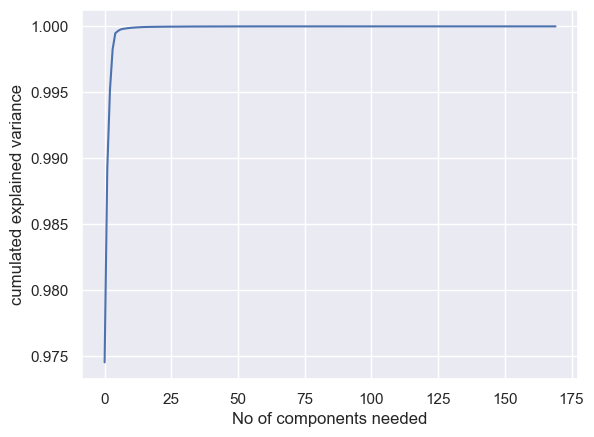

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components needed")
plt.ylabel("cumulated explained variance")


In [91]:
pca = PCA(10)
projected = pca.fit_transform(aps_test)

In [92]:
projected.shape

(60000, 10)

In [93]:
#projected

In [94]:
aps_pca = pd.DataFrame(projected)

In [96]:
aps_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,1.794496e+09,3.211523e+05,-13914.100932,3.221798e+06,1.246086e+07,5.302119e+06,-3.443515e+05,9.257052e+04,-1.213335e+06,2.904779e+06
1,-3.361937e+08,-5.375804e+06,-284084.983415,-6.810371e+06,-1.193847e+05,2.457512e+06,-2.267203e+05,-1.313286e+06,1.005464e+06,-8.059593e+05
2,-3.361927e+08,-5.608250e+06,-277150.003651,-1.020018e+07,-1.375904e+06,-1.456393e+06,8.431764e+05,1.618961e+05,-1.477105e+06,6.712680e+05
3,-3.361710e+08,-6.252036e+06,-263685.285572,-1.471480e+07,-8.833286e+06,-7.683078e+05,2.695536e+05,-2.691089e+05,5.879196e+05,-1.123004e+06
4,-3.362444e+08,-4.891118e+06,-310272.149088,1.014545e+07,-5.099864e+06,-2.738365e+06,1.926148e+06,7.931167e+05,-6.081120e+04,1.631404e+06


In [97]:
aps_pca['class'] = aps_df['class']

In [98]:
aps_pca.head()

,0,1,2,3,4,5,6,7,8,9,class
0,1.794496e+09,3.211523e+05,-13914.100932,3.221798e+06,1.246086e+07,5.302119e+06,-3.443515e+05,9.257052e+04,-1.213335e+06,2.904779e+06,neg
1,-3.361937e+08,-5.375804e+06,-284084.983415,-6.810371e+06,-1.193847e+05,2.457512e+06,-2.267203e+05,-1.313286e+06,1.005464e+06,-8.059593e+05,neg
2,-3.361927e+08,-5.608250e+06,-277150.003651,-1.020018e+07,-1.375904e+06,-1.456393e+06,8.431764e+05,1.618961e+05,-1.477105e+06,6.712680e+05,neg
3,-3.361710e+08,-6.252036e+06,-263685.285572,-1.471480e+07,-8.833286e+06,-7.683078e+05,2.695536e+05,-2.691089e+05,5.879196e+05,-1.123004e+06,neg
4,-3.362444e+08,-4.891118e+06,-310272.149088,1.014545e+07,-5.099864e+06,-2.738365e+06,1.926148e+06,7.931167e+05,-6.081120e+04,1.631404e+06,neg


In [174]:
label = aps_pca[['class']]

In [175]:
label.head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


In [176]:
X = aps_pca

y = label

In [177]:
X,y.shape

(                  0             1              2             3             4  \
 0      1.794496e+09  3.211523e+05  -13914.100932  3.221798e+06  1.246086e+07   
 1     -3.361937e+08 -5.375804e+06 -284084.983415 -6.810371e+06 -1.193847e+05   
 2     -3.361927e+08 -5.608250e+06 -277150.003651 -1.020018e+07 -1.375904e+06   
 3     -3.361710e+08 -6.252036e+06 -263685.285572 -1.471480e+07 -8.833286e+06   
 4     -3.362444e+08 -4.891118e+06 -310272.149088  1.014545e+07 -5.099864e+06   
 ...             ...           ...            ...           ...           ...   
 59995 -3.364199e+08 -2.457138e+06 -415694.435132  7.192584e+07 -1.089942e+07   
 59996  1.794511e+09 -1.373746e+06   20155.983755 -7.800156e+06 -6.727554e+06   
 59997  1.794512e+09 -1.429219e+06   22479.383014 -9.193486e+06 -6.593671e+06   
 59998  1.794448e+09  9.781449e+05  -63584.040441  3.726327e+07 -3.386379e+06   
 59999 -3.362756e+08 -4.894499e+06 -328713.944386  2.487751e+07 -1.621831e+07   
 
                   5      